<a href="https://colab.research.google.com/github/siikko/Adaline-full-batch-gradient-descent-/blob/main/Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd

class AdalineGD:
  def __init__(self,learning_rate=0.01,epochs=50,random_state=1):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.random_state=random_state

  def net_input(self,x):
    return np.dot(x,self.w)+self.b

  def activation(self,x):
    return x

  def predict(self,x):
    return np.where(self.activation(self.net_input(x))>=0.5,1,0)

  def fit(self,x,y):
    rgen=np.random.RandomState(self.random_state)
    self.w=rgen.normal(loc=0.0,scale=0.01,size=x.shape[1])
    self.b=np.float_(0.)
    self.losses=[]

    for _ in range(self.epochs):
      net_input=self.net_input(x)
      output=self.activation(net_input)
      errors=(y-output)
      self.w+=self.learning_rate*2.0*x.T.dot(errors)/x.shape[0]
      self.b+=self.learning_rate*2.0*errors.mean()
      loss=(errors**2).mean()
      self.losses.append(loss)
    return self



In [50]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')


df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


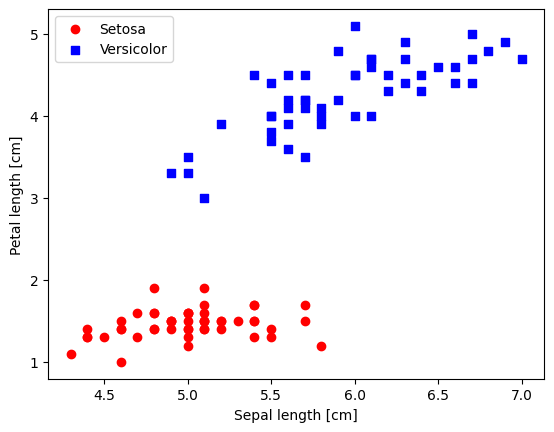

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)


x = df.iloc[0:100, [0, 2]].values


plt.scatter(x[:50, 0], x[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

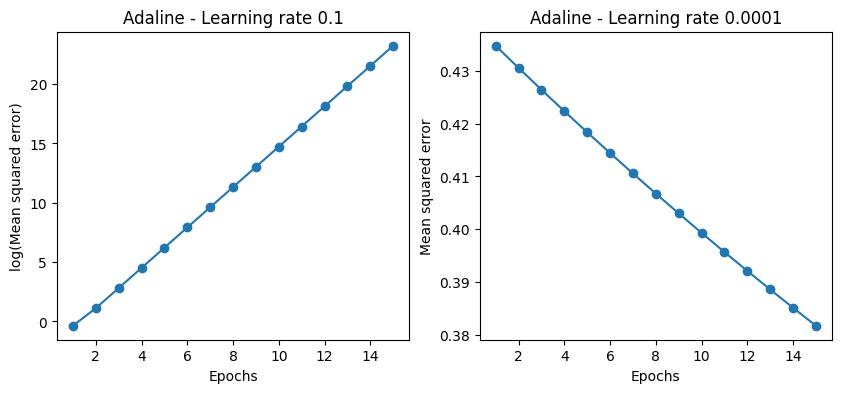

In [52]:
# 하이퍼파라미터에 따라 발생하는 문제들
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(epochs=15, learning_rate=0.1).fit(x, y)
ax[0].plot(range(1, len(ada1.losses) + 1), np.log10(ada1.losses), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(epochs=15, learning_rate=0.0001).fit(x, y)
ax[1].plot(range(1, len(ada2.losses) + 1), ada2.losses, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')


plt.show()

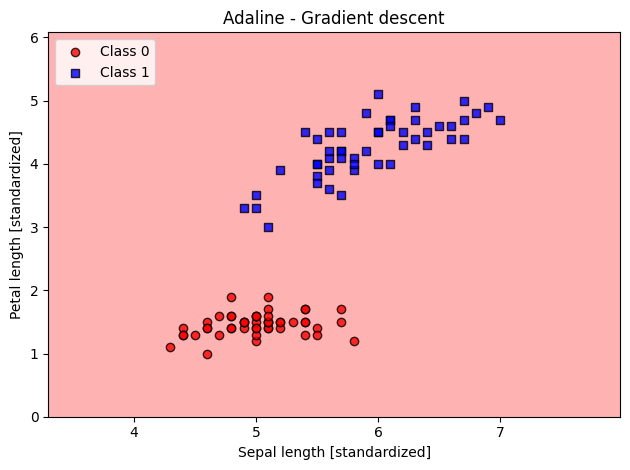

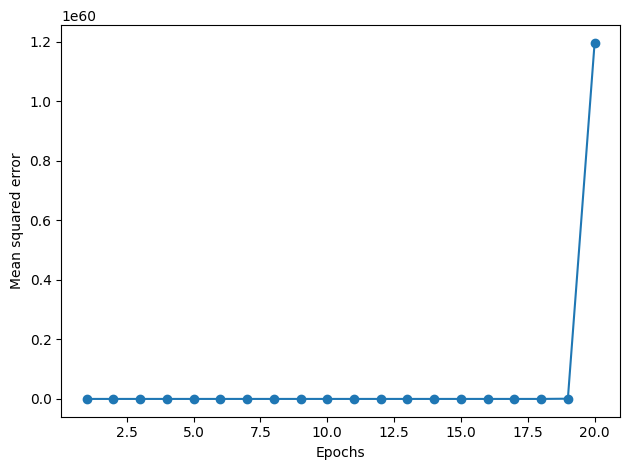

In [53]:
#표준화를 하지 않았을 때의 학습 결과

ada_gd = AdalineGD(epochs=20, learning_rate=0.5)
ada_gd.fit(x, y)

plot_decision_regions(x, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.losses) + 1), ada_gd.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [54]:
#특성 스케일을 조정할 수 있는 표준화를 통해서 Adaline모델을 훈련
x_std = np.copy(x)
x_std[:, 0] = (x[:, 0] - x[:, 0].mean()) /x[:, 0].std()
x_std[:, 1] = (x[:, 1] - x[:, 1].mean()) /x[:, 1].std()

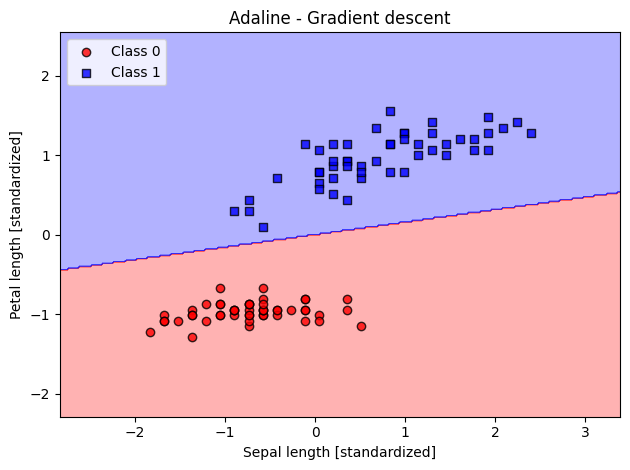

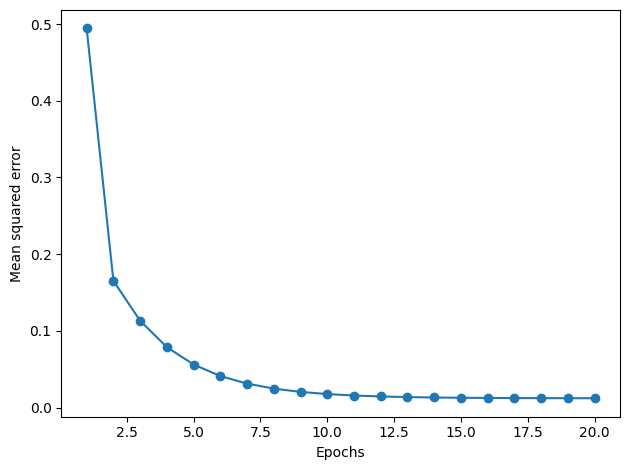

In [55]:
#표준화를 하고 나서의 학습 결과
ada_gd = AdalineGD(epochs=20, learning_rate=0.5)
ada_gd.fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses) + 1), ada_gd.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
plt.show()